In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = pd.read_excel("Train_dataset.xlsx",index_col="Stock Index")

In [3]:
stock.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,,,
AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
stock.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,7345.000000,7321.000000,7322.000000,7149.000000,7.115000e+03,6984.000000,7007.000000,7312.000000,7306.000000,7298.000000,7358.000000,7383.000000
mean,486.188167,24218.079195,54.746004,105.543623,1.041827e+07,5.436840,0.140654,0.038496,33.991103,0.944722,4.996782,569.522650
std,278.280638,19602.174448,25.865877,55.284466,5.689059e+06,1.655755,0.384544,0.013406,34.036816,0.202732,2.616719,423.896621
min,5.250000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,247.100000,11270.150000,32.722500,57.630000,5.577644e+06,4.020000,0.030000,0.026900,1.000000,0.770000,2.762500,223.516594
50%,488.380000,12765.840000,54.510000,105.770000,1.048238e+07,5.440000,0.110000,0.038400,17.700000,0.940000,5.020000,458.716483
75%,724.020000,38182.080000,77.397500,154.130000,1.529882e+07,6.870000,0.230000,0.050200,74.900000,1.120000,7.217500,827.927051
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


In [5]:
stock["Industry"].nunique()

5

In [6]:
stock["Index"].nunique()

5

In [7]:
stock.fillna(0,inplace=True)

In [8]:
stock.corr()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
VWAP,1.000000,0.002875,0.012955,-0.001984,0.013967,-0.008077,-0.014269,-0.002304,-0.009803,0.003238,-0.020255,0.009252
General Index,0.002875,1.000000,0.007045,0.020003,0.009676,0.008413,0.009319,-0.004721,0.170557,-0.001072,0.004340,0.008817
NAV,0.012955,0.007045,1.000000,-0.002094,0.001155,0.011822,0.002434,0.007392,0.005927,0.005677,-0.011442,0.615827
P/E Ratio,-0.001984,0.020003,-0.002094,1.000000,0.082216,0.015727,0.006045,0.025363,0.000293,0.017759,0.009250,0.638640
Volumes Traded,0.013967,0.009676,0.001155,0.082216,1.000000,0.048736,0.013942,0.018602,0.003026,0.026739,0.008696,-0.009755
Inventory Turnover,-0.008077,0.008413,0.011822,0.015727,0.048736,1.000000,0.065038,0.027378,-0.001766,0.018897,0.013077,0.014905
Covid Impact (Beta),-0.014269,0.009319,0.002434,0.006045,0.013942,0.065038,1.000000,0.013359,0.005589,0.007477,0.000030,0.005402
Tracking Error,-0.002304,-0.004721,0.007392,0.025363,0.018602,0.027378,0.013359,1.000000,0.024123,0.059604,-0.009605,0.013969
Dollar Exchange Rate,-0.009803,0.170557,0.005927,0.000293,0.003026,-0.001766,0.005589,0.024123,1.000000,0.035692,0.012727,-0.002236
Put-Call Ratio,0.003238,-0.001072,0.005677,0.017759,0.026739,0.018897,0.007477,0.059604,0.035692,1.000000,0.010502,0.003368


In [9]:
dummies_industry = pd.get_dummies(data = stock["Industry"],  sparse=False, drop_first=True)

In [10]:
stock.head(1)

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,,,
AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.052,1.0,0.61,9.2,156.987852


In [11]:
dummies_index = pd.get_dummies(data = stock["Index"],  sparse=False, drop_first=True)

In [12]:
stock_wII = stock.drop(["Index","Industry"], axis = 1)

In [13]:
stock_train = pd.concat([stock_wII,dummies_industry,dummies_index],axis=1)

In [14]:
X = stock_train.drop(['Stock Price'],axis=1)

In [15]:
y = stock_train['Stock Price']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions=lm.predict(X_test)

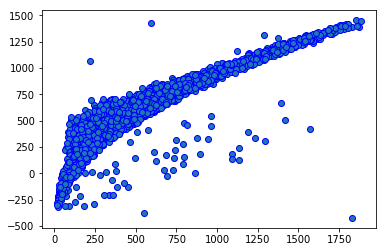

In [22]:
plt.scatter(x=y_test,y=predictions,edgecolors='blue')

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 126.8854961915853
MSE: 33816.05209567137
RMSE: 183.89141387153282


In [24]:
stock_wII.columns

Index(['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded',
       'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error',
       'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')

In [25]:
X2 = stock_wII.drop(['Stock Price'],axis=1)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=101)

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predictions=lm.predict(X_test)

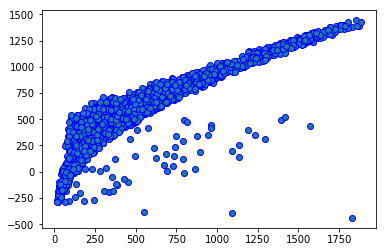

In [29]:
plt.scatter(x=y_test,y=predictions,edgecolors='blue')

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 128.61790610006176
MSE: 34480.216119210185
RMSE: 185.68849215611124


In [31]:
X3 = stock_wII[['VWAP','NAV','P/E Ratio','Inventory Turnover']]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=101)

In [33]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predictions=lm.predict(X_test)

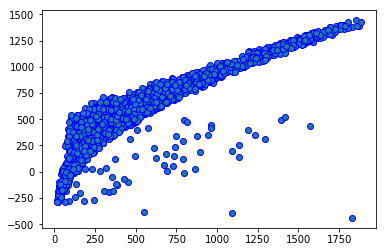

In [35]:
plt.scatter(x=y_test,y=predictions,edgecolors='blue')

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 128.61790610006176
MSE: 34480.216119210185
RMSE: 185.68849215611124


In [37]:
X = stock_train.drop(['Stock Price'],axis=1)
y = stock_train['Stock Price']
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
stock_test = pd.read_excel("Test_dataset.xlsx",index_col="Stock Index")

In [39]:
stock_test.fillna(0,inplace=True)

In [40]:
dummies_test_industry = pd.get_dummies(data = stock_test["Industry"],  sparse=False, drop_first=True)
dummies_test_index = pd.get_dummies(data = stock_test["Index"],  sparse=False, drop_first=True)

In [41]:

stock_test.drop(["Industry","Index"],axis = 1,inplace = True)


In [42]:
stock_test.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
Stock Index,,,,,,,,,,,
AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.00,6.18


In [43]:
Final_test = pd.concat([stock_test,dummies_test_industry,dummies_test_index],axis=1)

In [44]:
Final_test.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate,JSE,NSE,NYSE,S&P 500
Stock Index,,,,,,,,,,,,,,,,,,,
AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,0,0,1,0,0,1,0,0
AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,0,0,0,0,1,0,0,0
AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,0,1,0,0,0,0,0,1
AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,1,0,0,0,0,1,0,0
AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.00,6.18,0,0,1,0,0,0,1,0


In [45]:
X_test = Final_test
predictions=lm.predict(X_test)
predictions.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [46]:
Final_test.columns
Final_test.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate,JSE,NSE,NYSE,S&P 500
Stock Index,,,,,,,,,,,,,,,,,,,
AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,0,0,1,0,0,1,0,0
AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,0,0,0,0,1,0,0,0
AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,0,1,0,0,0,0,0,1
AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,1,0,0,0,0,1,0,0
AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.00,6.18,0,0,1,0,0,0,1,0


In [47]:
Final_test["Stock Price"] = pd.Series(predictions)

In [48]:
print(pd.Series(predictions))

0        850.717831
1        465.091523
2       1247.710160
3        817.847797
4        384.281999
5        511.625513
6        852.465808
7        922.994970
8       1040.825664
9       1198.545863
10       523.013814
11       424.186443
12       468.035214
13      -116.664256
14      -144.380589
15      -188.969211
16      1402.692594
17        46.386311
18       492.732559
19       166.962089
20       964.511102
21       793.219043
22      1315.512460
23       482.773099
24       252.658177
25       281.009056
26       111.611560
27       279.284497
28       408.772805
29        43.320286
           ...     
3301    1006.616888
3302    1312.592687
3303     550.718339
3304     747.384705
3305    1137.553924
3306     375.188451
3307     317.330658
3308     717.637409
3309    1028.027893
3310     334.292786
3311     209.862190
3312    1071.478833
3313     556.613099
3314     289.627472
3315    -140.047997
3316     285.395124
3317     548.423905
3318     563.520576
3319     268.418233


In [49]:
To_find_index = pd.read_excel("Test_dataset.xlsx")
output = pd.concat([To_find_index["Stock Index"],pd.Series(predictions)],axis=1)

In [50]:
output.rename(columns={0: "Stock Price"},inplace = True)

In [51]:
output.head()

,Stock Index,Stock Price
0,AC3235,850.717831
1,AC3236,465.091523
2,AC3237,1247.710160
3,AC3238,817.847797
4,AC3239,384.281999


In [52]:
output.to_csv('Jai_Mehta_ML_Part1.csv') 

In [53]:
output.head()

,Stock Index,Stock Price
0,AC3235,850.717831
1,AC3236,465.091523
2,AC3237,1247.710160
3,AC3238,817.847797
4,AC3239,384.281999


In [57]:
X_stock = pd.read_excel("Train_dataset.xlsx",index_col="Stock Index")

In [58]:
X_stock.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,,,
AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [59]:
X_stock["General Index"].fillna(np.mean(stock["General Index"]),inplace = True)
X_stock["VWAP"].fillna(np.mean(stock["VWAP"]),inplace = True)
X_stock["NAV"].fillna(np.mean(stock["NAV"]),inplace = True)
X_stock["P/E Ratio"].fillna(np.mean(stock["P/E Ratio"]),inplace = True)
X_stock["Volumes Traded"].fillna(np.mean(stock["Volumes Traded"]),inplace = True)
X_stock["Inventory Turnover"].fillna(np.mean(stock["Inventory Turnover"]),inplace = True)
X_stock["Covid Impact (Beta)"].fillna(np.mean(stock["Covid Impact (Beta)"]),inplace = True)
X_stock["Dollar Exchange Rate"].fillna(np.mean(stock["Dollar Exchange Rate"]),inplace = True)
X_stock["Put-Call Ratio"].fillna(np.mean(stock["Put-Call Ratio"]),inplace = True)
X_stock["P/B Ratio"].fillna(np.mean(stock["P/B Ratio"]),inplace = True)
X_stock["Tracking Error"].fillna(np.mean(stock["Tracking Error"]),inplace = True)

In [61]:
np.mean(stock["VWAP"])
np.mean(stock["NAV"])
np.mean(stock["P/E Ratio"])
np.mean(stock["Volumes Traded"])
np.mean(stock["Inventory Turnover"])
np.mean(stock["Covid Impact (Beta)"])
np.mean(stock["Dollar Exchange Rate"])
np.mean(stock["Put-Call Ratio"])
np.mean(stock["P/B Ratio"])

4.979861844778555

In [62]:
dummies_X_stock_industry = pd.get_dummies(data = X_stock["Industry"],  sparse=False, drop_first=True)
dummies_X_stock_test_index = pd.get_dummies(data = X_stock["Index"],  sparse=False, drop_first=True)
X_stock.drop(["Industry","Index"],axis = 1,inplace = True)

X_stock.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,
AA1,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,156.987852
AA2,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.933845,6.91,560.859622
AA3,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.933845,6.09,1279.732874
AA4,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,1121.787632
AA5,483.685777,3351.28,23.79,102.198478,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,382.962534


In [63]:
X3 = pd.concat([X_stock,dummies_X_stock_industry,dummies_X_stock_test_index],axis=1)

In [64]:
X3.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Healthcare,Information Tech,Materials,Real Estate,JSE,NSE,NYSE,S&P 500
Stock Index,,,,,,,,,,,,,,,,,,,,
AA1,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,156.987852,0,0,0,1,0,0,1,0
AA2,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.933845,6.91,560.859622,0,1,0,0,0,0,1,0
AA3,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.933845,6.09,1279.732874,0,1,0,0,0,0,1,0
AA4,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,1121.787632,0,0,1,0,0,0,0,0
AA5,483.685777,3351.28,23.79,102.198478,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,382.962534,0,0,0,1,0,0,0,1


In [65]:
y = X3["Stock Price"]
X_t = X3.drop(["Stock Price"],axis = 1)

In [70]:
X_test = pd.read_excel("Test_dataset.xlsx",index_col="Stock Index")
dummies_X_test_industry = pd.get_dummies(data = X_test["Industry"],  sparse=False, drop_first=True)
dummies_X_test_index = pd.get_dummies(data = X_test["Index"],  sparse=False, drop_first=True)
X_test.drop(["Industry","Index"],axis = 1,inplace = True)
X_test_final = pd.concat([X_test,dummies_X_test_industry,dummies_X_test_index],axis=1)


,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,
AA1,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,156.987852
AA2,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,0.933845,6.91,560.859622
AA3,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,0.933845,6.09,1279.732874
AA4,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,1121.787632
AA5,483.685777,3351.28,23.79,102.198478,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,382.962534


In [74]:
X_test_final["General Index"].fillna(np.mean(X_test_final["General Index"]),inplace = True)
X_test_final["VWAP"].fillna(np.mean(X_test_final["VWAP"]),inplace = True)
X_test_final["NAV"].fillna(np.mean(X_test_final["NAV"]),inplace = True)
X_test_final["P/E Ratio"].fillna(np.mean(X_test_final["P/E Ratio"]),inplace = True)
X_test_final["Volumes Traded"].fillna(np.mean(X_test_final["Volumes Traded"]),inplace = True)
X_test_final["Inventory Turnover"].fillna(np.mean(X_test_final["Inventory Turnover"]),inplace = True)
X_test_final["Covid Impact (Beta)"].fillna(np.mean(X_test_final["Covid Impact (Beta)"]),inplace = True)
X_test_final["Dollar Exchange Rate"].fillna(np.mean(X_test_final["Dollar Exchange Rate"]),inplace = True)
X_test_final["Put-Call Ratio"].fillna(np.mean(X_test_final["Put-Call Ratio"]),inplace = True)
X_test_final["P/B Ratio"].fillna(np.mean(X_test_final["P/B Ratio"]),inplace = True)
X_test_final["Tracking Error"].fillna(np.mean(X_test_final["Tracking Error"]),inplace = True)
X_test_final.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Healthcare,Information Tech,Materials,Real Estate,JSE,NSE,NYSE,S&P 500
Stock Index,,,,,,,,,,,,,,,,,,,
AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.800000,4.66,0,0,1,0,0,1,0,0
AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.860000,6.11,0,0,0,0,1,0,0,0
AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.930000,4.99,0,1,0,0,0,0,0,1
AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.090000,1.26,1,0,0,0,0,1,0,0
AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,0.938828,6.18,0,0,1,0,0,0,1,0


In [67]:
lm.fit(X_t,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**************************************************************************8

In [75]:
predictions=lm.predict(X_test_final)


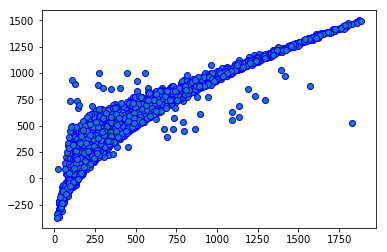

In [286]:
plt.scatter(x=y_test,y=predictions,edgecolors='blue')

In [287]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 115.19462669160802
MSE: 24765.78400557783
RMSE: 157.37148409282358


In [76]:
Stock_price_final = pd.Series(predictions)

In [6]:
put_call = pd.read_excel("Book1.xlsx",index_col="Stock Index")
put_call.head()

,One,Two,Three,Four,Five,Six
Stock Index,,,,,,
AC3235,0.80,0.660,0.77240,0.983224,0.901211,0.898368
AC3236,0.86,0.732,0.85448,1.086645,1.017042,1.029258
AC3237,0.93,0.816,0.95024,1.207302,NaN,1.181962
AC3238,1.09,1.008,1.16912,1.483091,1.461062,1.531000
AC3239,NaN,1.104,1.27856,1.620986,1.615504,1.705519


In [7]:
put_call["One"].fillna(np.mean(put_call["One"]),inplace = True)

In [8]:
put_call["Two"].fillna(np.mean(put_call["Two"]),inplace = True)
put_call["Three"].fillna(np.mean(put_call["Three"]),inplace = True)
put_call["Four"].fillna(np.mean(put_call["Four"]),inplace = True)
put_call["Five"].fillna(np.mean(put_call["Five"]),inplace = True)
put_call["Six"].fillna(np.mean(put_call["Six"]),inplace = True)

In [9]:
X_trial = put_call.drop(["Six"],axis=1)
y_trial = put_call["Six"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_trial,y_trial,test_size=0.3,random_state=101)

NameError: name 'train_test_split' is not defined

In [11]:
lm.fit(X_train,y_train)

NameError: name 'lm' is not defined

In [125]:
predictions = lm.predict(X_test)

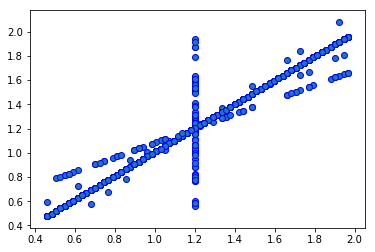

In [126]:
plt.scatter(x=y_test,y=predictions,edgecolors='blue')

In [128]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0347952567108866
MSE: 0.009814227329046304
RMSE: 0.09906678216761815


In [12]:
from pandas.plotting import autocorrelation_plot

In [13]:
put_call.head()

,One,Two,Three,Four,Five,Six
Stock Index,,,,,,
AC3235,0.800000,0.660,0.77240,0.983224,0.901211,0.898368
AC3236,0.860000,0.732,0.85448,1.086645,1.017042,1.029258
AC3237,0.930000,0.816,0.95024,1.207302,1.165254,1.181962
AC3238,1.090000,1.008,1.16912,1.483091,1.461062,1.531000
AC3239,0.938828,1.104,1.27856,1.620986,1.615504,1.705519


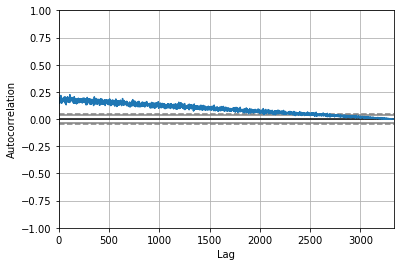

In [14]:
autocorrelation_plot(put_call)

In [35]:
put_call.corr()

,One,Two,Three,Four,Five,Six
One,1.000000,0.929254,0.929664,0.926300,0.910331,0.947001
Two,0.929254,1.000000,0.991407,0.997055,0.983984,0.964362
Three,0.929664,0.991407,1.000000,0.989656,0.975672,0.955422
Four,0.926300,0.997055,0.989656,1.000000,0.983235,0.962632
Five,0.910331,0.983984,0.975672,0.983235,1.000000,0.948174
Six,0.947001,0.964362,0.955422,0.962632,0.948174,1.000000
